In [1]:
import os
import pandas as pd
from datetime import date
from helpers import *

# importo el archivo
csv_file="./eventos_procesados.csv"
df_original =pd.read_csv(csv_file)

# default sizes
SIZE_X=15
SIZE_Y=15

df_original.head(10)
df_eventos=df_original.copy()

# Imprime el día de hoy
print(f"Fecha: {date.today()}")


In [2]:
# cuenta los incidentes por año
eventos_por_anio=df_eventos.groupby(("anio")).evento.count()
print("Incidentes por año")

print(eventos_por_anio)

# promedio por año
promedio = eventos_por_anio.mean()

print(f"Ataques promedio por año: {promedio}")

Incidentes por año
anio
2017     3
2018     2
2019     2
2020     8
2021     7
2022    26
2023    19
2024    16
Name: evento, dtype: int64
Ataques promedio por año: 10.375


Ataques en total: 83
Mayor cantidad de ataques por año 26
Menor cantidad de ataques por año 2
Promedio cantidad de ataques por año 10.375


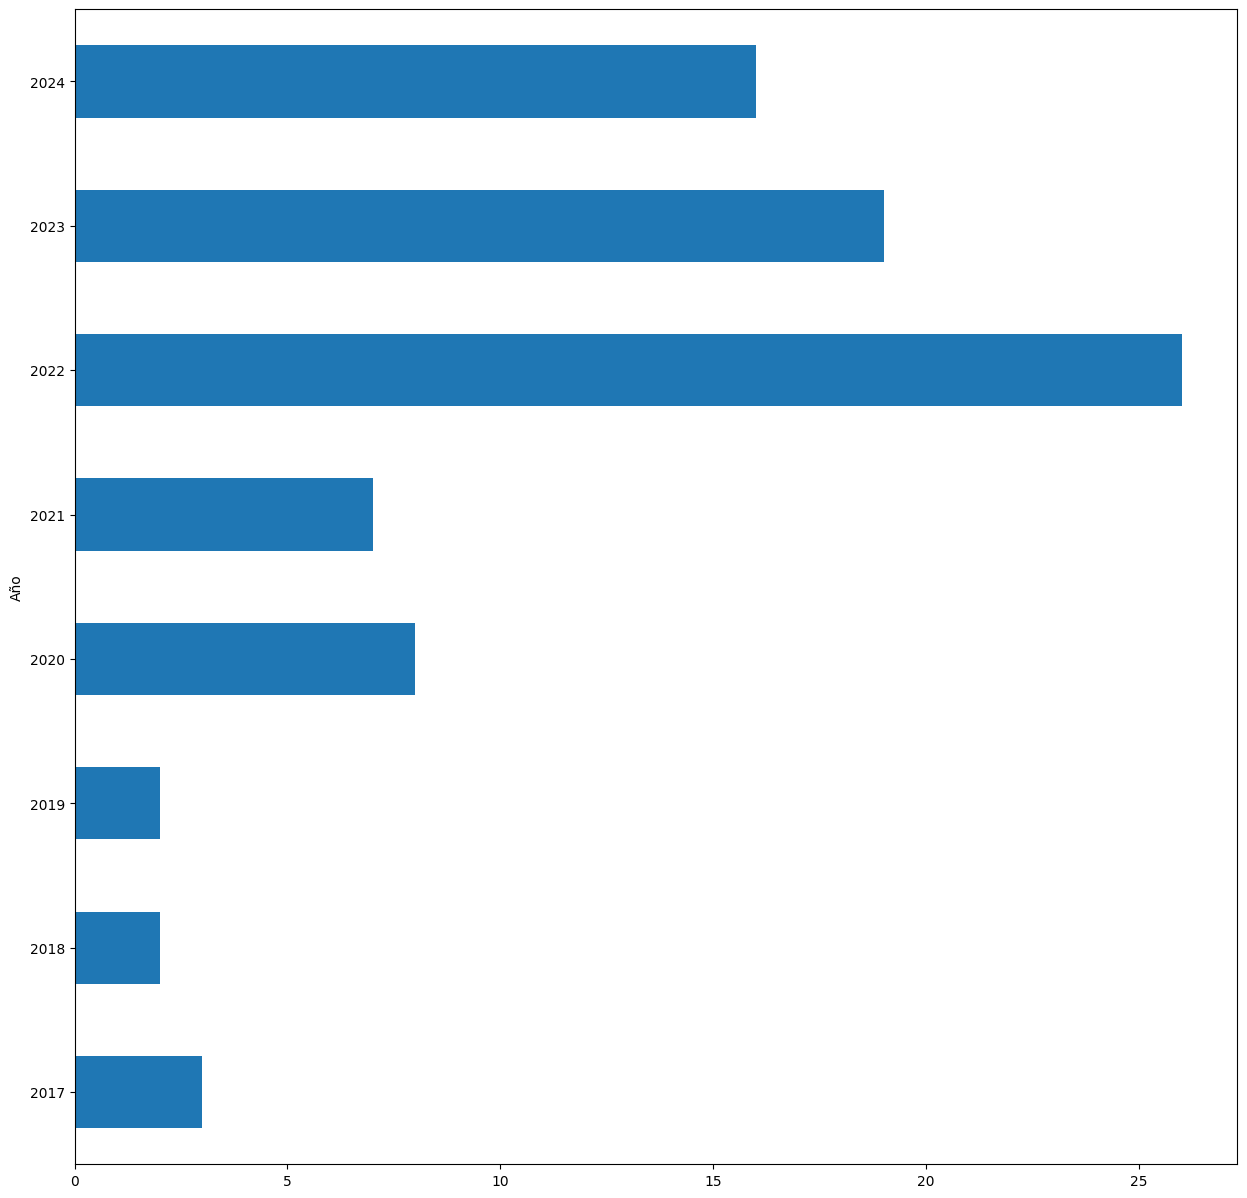

In [3]:
# graficar eventos por año
eventos_anio=df_eventos.groupby(("anio")).evento.count()
# eventos_anio.sort_values(inplace=True)
eventos_anio.plot.barh(ylabel="Año",figsize=(SIZE_X, SIZE_Y))

print(f"Ataques en total: {eventos_anio.sum()}")

print(f"Mayor cantidad de ataques por año {eventos_anio.max()}")
print(f"Menor cantidad de ataques por año {eventos_anio.min()}")
print(f"Promedio cantidad de ataques por año {eventos_anio.mean()}")

Meses con mayor cantidad de eventos:
Mayor cantidad de ataques por mes 11
Menor cantidad de ataques por mes 5
Promedio cantidad de ataques por mes 6.916666666666667


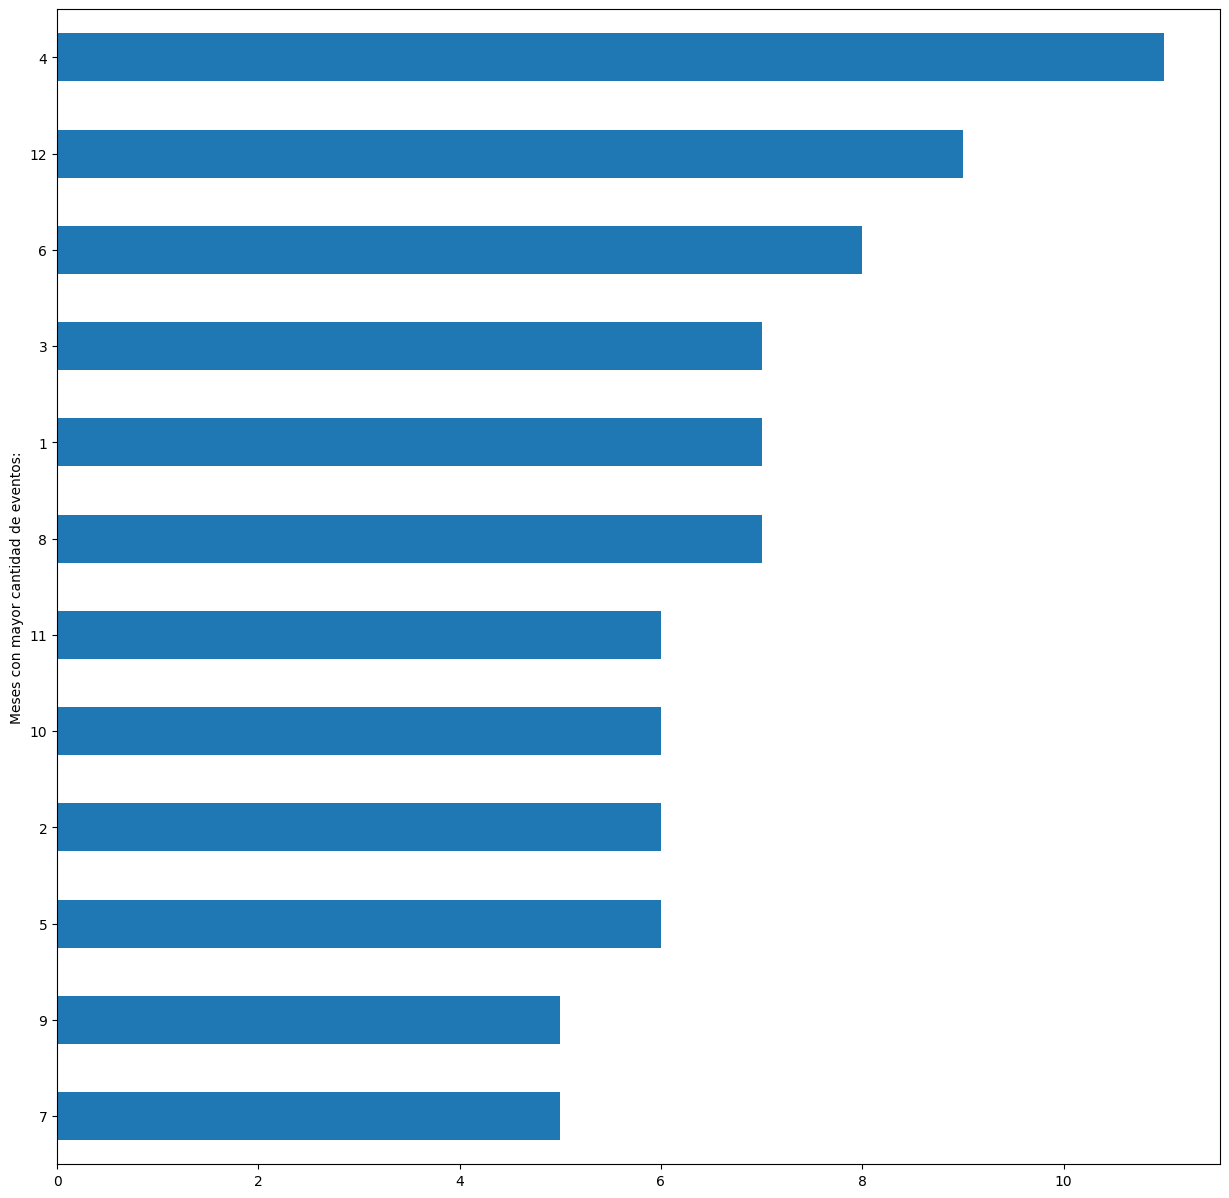

In [4]:
# graficar eventos por mes
print("Meses con mayor cantidad de eventos:")
eventos_mes=df_eventos.groupby(("mes")).evento.count()
eventos_mes.sort_values(inplace=True)
eventos_mes.plot.barh(ylabel="Meses con mayor cantidad de eventos:",figsize=(SIZE_X, SIZE_Y))
# fig.savefig(os.path.join("/exports/meses_eventos.png"),dpi=300,format="png",bbox_inches='tight')

print(f"Mayor cantidad de ataques por mes {eventos_mes.max()}")
print(f"Menor cantidad de ataques por mes {eventos_mes.min()}")
print(f"Promedio cantidad de ataques por mes {eventos_mes.mean()}")

Mayor ataque más común 39


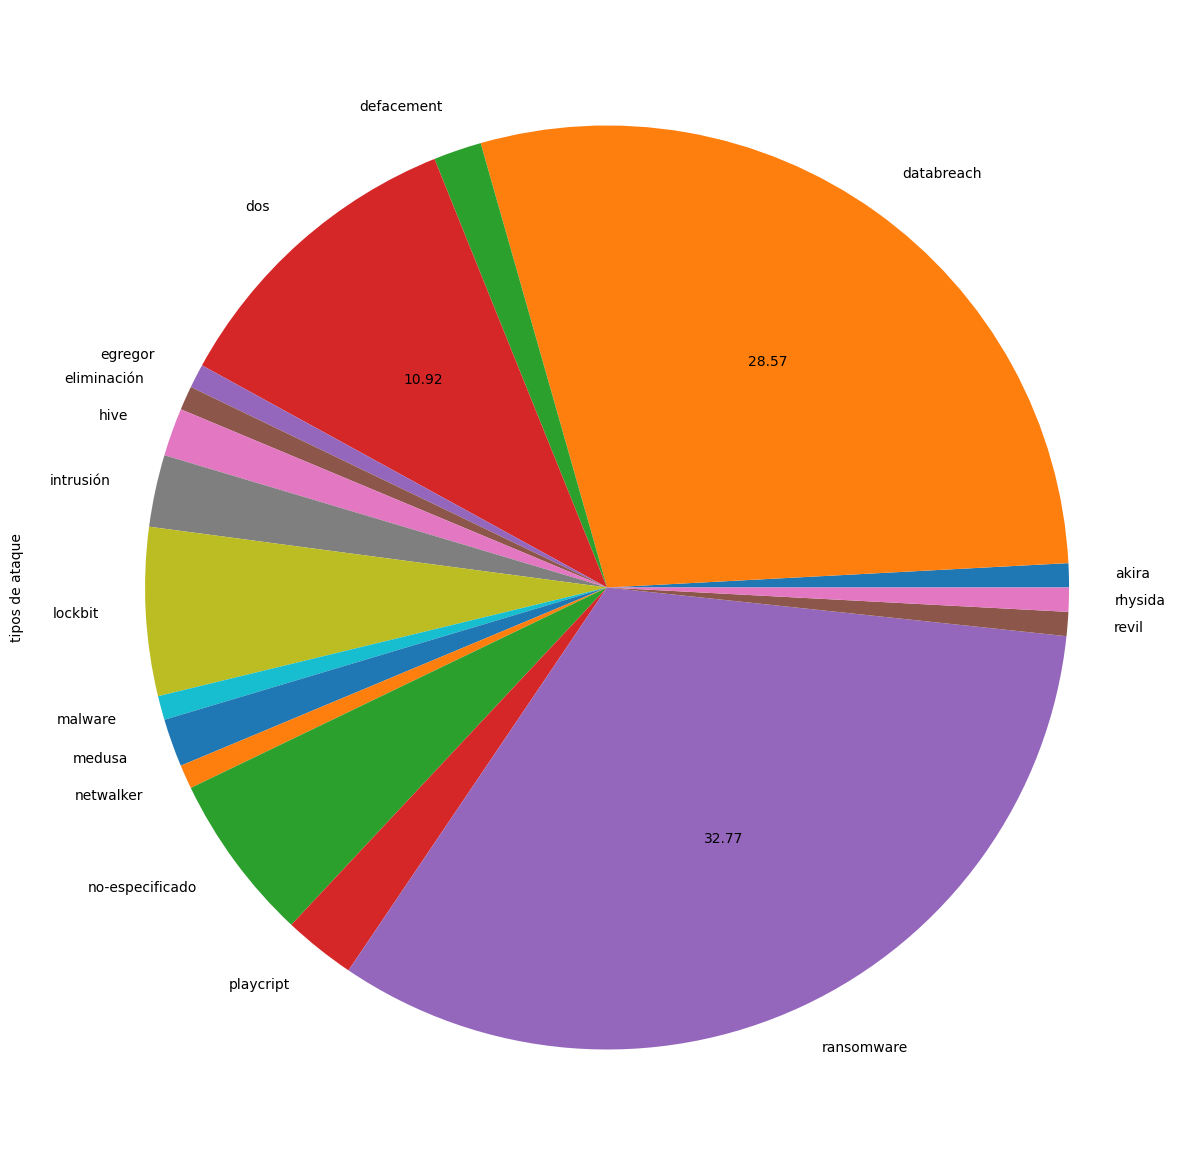

In [5]:
# En base a los tags obtengo un único tag. Cuento y grafico la cantiad de tags (tipos de ataques diferentes) en una torta
tag_list=df_eventos["tag"].to_list()
tag_list_clean=get_tag_list_unique(tag_list)



# se convierte a un dataframe y se imprimen los resultados
df_tag=pd.Series(tag_list_clean).to_frame("tag")
df_tag_grouped=df_tag.groupby("tag").tag.count()
df_tag_grouped.plot.pie(ylabel='tipos de ataque', figsize=(SIZE_X, SIZE_Y),autopct=autopct,subplots=True)

print(f"Mayor ataque más común {df_tag_grouped.max()}")

array([<Axes: ylabel='Tipos de ataques por evento'>], dtype=object)

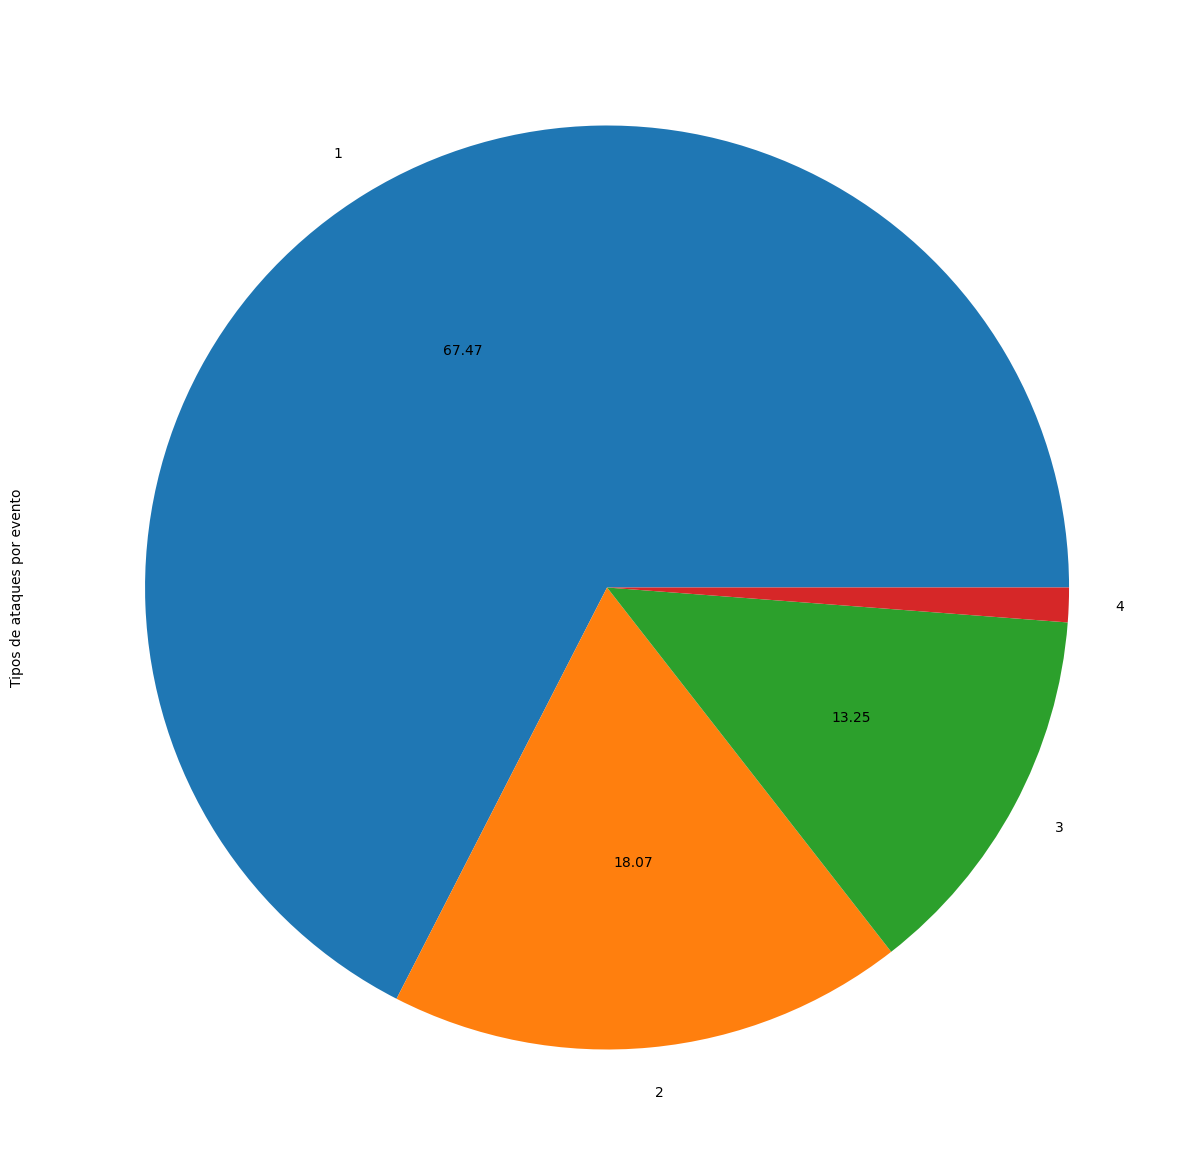

In [6]:
# Muestro cuantos enventos tienen más de un tipo de ataques. Por ejemplo cuales tienen ransomware y exfiltración
tag_list=df_eventos["tag"].to_list()
tag_list_counter=count_tag_list(tag_list)
# lo convierte en un df y imprimir
df_tags_counts=pd.Series(tag_list_counter).to_frame("tag_count")
df_tags_counts_grouped=df_tags_counts.groupby("tag_count").tag_count.count()
df_tags_counts_grouped.plot.pie(ylabel
                                ='Tipos de ataques por evento', figsize=(SIZE_X, SIZE_Y),autopct=autopct,subplots=True)

Mayor cantidad de ataques de ransomware 14
Menor cantidad de ataques de ransomware 1
Promedio cantidad de ataques de ransomware 6.5


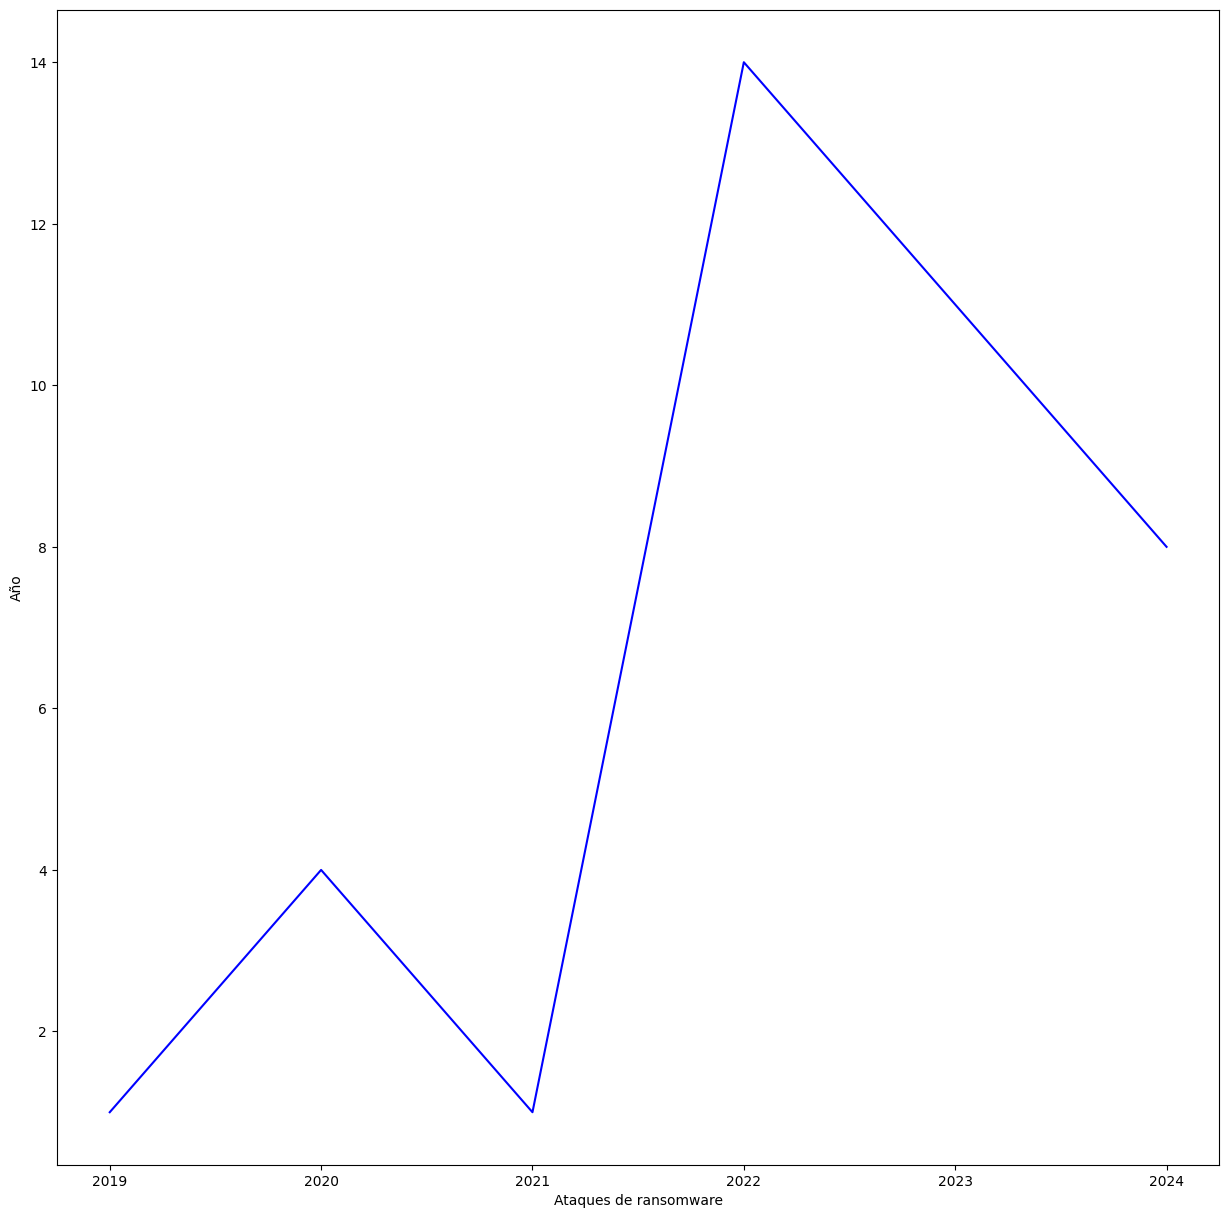

In [9]:
#filtrar por ransomware
# Tag específico por el cual quieres filtrar
tag_filtrar = 'ransomware'
# Aplicar el filtro usando apply y lambda
filtro = df_eventos[df_eventos['tag'].apply(lambda tags: tag_filtrar in tags)]

# grafica de eventos de ransomware
ransomware_por_anio=filtro.groupby("anio").evento.count()
# ransomware_por_anio.plot.bar()
ransomware_por_anio.plot.line(stacked=True, xlabel='Ataques de ransomware', ylabel='Año',figsize=(SIZE_X, SIZE_Y),color="b")
# plt.ylabel=("Año")

print(f"Mayor cantidad de ataques de ransomware {ransomware_por_anio.max()}")
print(f"Menor cantidad de ataques de ransomware {ransomware_por_anio.min()}")
print(f"Promedio cantidad de ataques de ransomware {ransomware_por_anio.mean()}")